In [58]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

dat= pd.read_csv("data/cleanind.csv")

In [59]:
dat = dat[~dat.health.isna()]
dat.dtypes
dat['Disability'] = np.where(dat['dis']==1,"Reported Disability","No Reported Disability")
dat.Disability.value_counts()

No Reported Disability    291559
Reported Disability       109438
Name: Disability, dtype: int64

In [60]:
pic1 = (
    ggplot(dat) + 
    geom_bar(aes(x= 'Disability' ,fill = 'Disability')) + 
    scale_fill_manual(values=["#0072B2", "#D55E00"], guide=False) +
    theme_minimal() +
    labs(title = "Figure 2: Distribution of Reported Disability",
          x= "",
          y= "Number of BRFSS Respondents")
    
)

pic1.save(filename = 'image/fig2.png', height=3.5, width=4.5, units = 'in', dpi=1000)


C:\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4.5 x 3.5 in image.
C:\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: image/fig2.png


In [61]:
pic2 = (
    ggplot(dat) + 
    geom_bar(aes(x= 'health',fill = 'Disability')) + 
    scale_fill_manual(values=["#0072B2", "#D55E00"]) +
    theme_minimal() +
    labs(title = "Figure 1: Distribution of Overall Health Ratings",
          x= "Health Ratings from Poor (1) to Excellent (5)",
          y= "Number of BRFSS Respondents")
    
)


pic2.save(filename = 'image/fig1.png', height=3.5, width=4.5, units = 'in', dpi=1000)

C:\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4.5 x 3.5 in image.
C:\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: image/fig1.png


C:\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 7110 rows containing missing values.


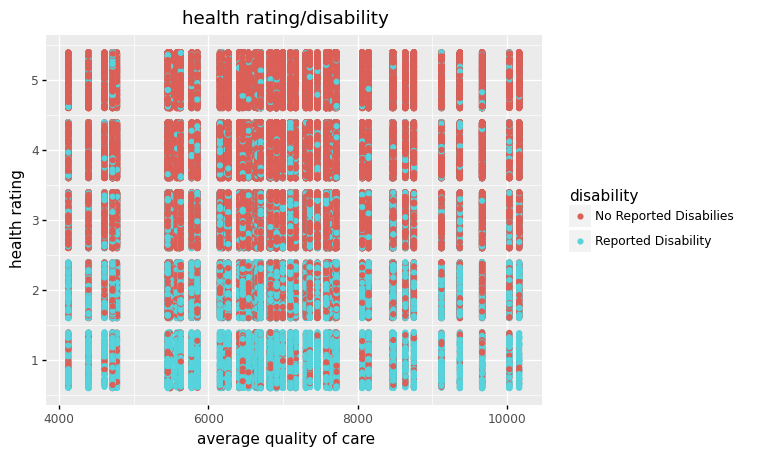

<ggplot: (96790641053)>

C:\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 22399 rows containing missing values.


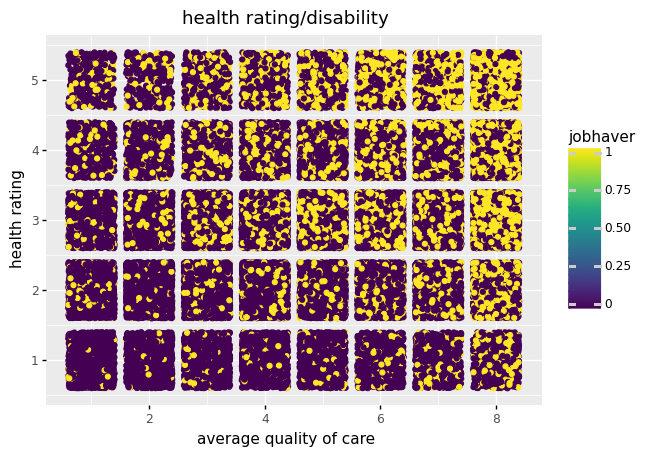

<ggplot: (96803155282)>

In [21]:
disdat = dat[dat.dis==1]

(
    ggplot(disdat,aes(x = "INCOME2", y ='health',groupby ='jobhaver')) +
    geom_point( aes(color = "jobhaver"),position = "jitter")
      + labs(title = "health rating/disability",
          x= "average quality of care",
          y= "health rating")
)

In [65]:
stategrp = (disdat
       .groupby(["state"])
       .mean(["health",'avgqoc','Medicaid per enrollee','Medicaid per disabled enrollee'])
       .reset_index()
      )


pic8=(
    ggplot(stategrp,aes(x = "Medicaid per enrollee", y ='health')) +
    geom_point(position = "jitter")
    + geom_smooth(method="lm",se=False,color="#0072B2" )
     + theme_minimal() 
      + labs(title = "Figure 8 :Health by State Quality of Care",
          x= "State's average Medicaid spending per enrollee",
          y= "Health Rating (From 1-5, 1 being poor)")
)

pic8.save(filename = 'image/fig8.png', height=4.5, width=4.5, units = 'in', dpi=1000)

C:\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4.5 x 4.5 in image.
C:\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: image/fig8.png
C:\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


In [66]:
pic7=(
    ggplot(stategrp,aes(x = "avgqoc", y ='health')) +
    geom_point( position = "jitter")
    + geom_smooth(method="lm",se=False,color="#0072B2") 
    + theme_minimal() 
     + labs(title = "Figure 7: Health by State Quality of Care",
          x= "State's average rating across quality of care measures",
          y= "Health Rating (From 1-5, 1 being poor)")
)

pic7.save(filename = 'image/fig7.png', height=4.5, width=4.5, units = 'in', dpi=1000)

C:\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4.5 x 4.5 in image.
C:\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: image/fig7.png
C:\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
